In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import yaml
import h5py
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def bsCorrelator(corr,nBS):
    bsLen = len(corr)
    nt = len(corr[0])
    bsSamples=np.random.randint(0,bsLen,[nBS,bsLen])
    bsCorr=[]
    for sample in bsSamples:
        temp = []
        for bs in sample:
            temp.append(corr[bs])
        temp = np.array(temp)
        bsCorr.append(np.mean(temp,0))
    bsCorr = np.array(bsCorr)
    return np.mean(bsCorr,0), np.std(bsCorr,0)

def bsExpEffMass(corr,nBS,delta):
    bsLen = len(corr)
    nt = len(corr[0])
    bsSamples=np.random.randint(0,bsLen,[nBS,bsLen])
    bsEffM=[]
    for sample in bsSamples:
        temp = []
        for bs in sample:
            temp.append(corr[bs])
        temp = np.mean(np.array(temp),0)
        effM = np.array([np.log(np.real(temp[t]/temp[t+delta]))/delta for t in range(nt-delta)])
        bsEffM.append(effM)
    bsEffM = np.array(bsEffM)
    return np.mean(bsEffM,0), np.std(bsEffM,0)

def bsCoshEffMass(corr,nBS,delta):
    bsLen = len(corr)
    nt = len(corr[0])
    bsSamples=np.random.randint(0,bsLen,[nBS,bsLen])
    bsEffM=[]
    for sample in bsSamples:
        temp = []
        for bs in sample:
            temp.append(corr[bs])
        temp = np.mean(np.array(temp),0)
        effM = np.array([np.real(np.arccosh((temp[t+delta]+temp[t-delta])/(2*temp[t])))/delta for t in range(delta,nt-delta)])
        bsEffM.append(effM)
    bsEffM = np.array(bsEffM)
    return np.mean(bsEffM,0), np.std(bsEffM,0)

In [24]:
U=1
beta=3
Nt=32
delta=beta/Nt

nx=1
ny=2

Lambda = nx*ny*2

# load h5 file
h5 = h5py.File('../build/example_four_sites.h5','r')

In [25]:
def f(e,beta):
    return 1/(1+np.exp(-e*beta))

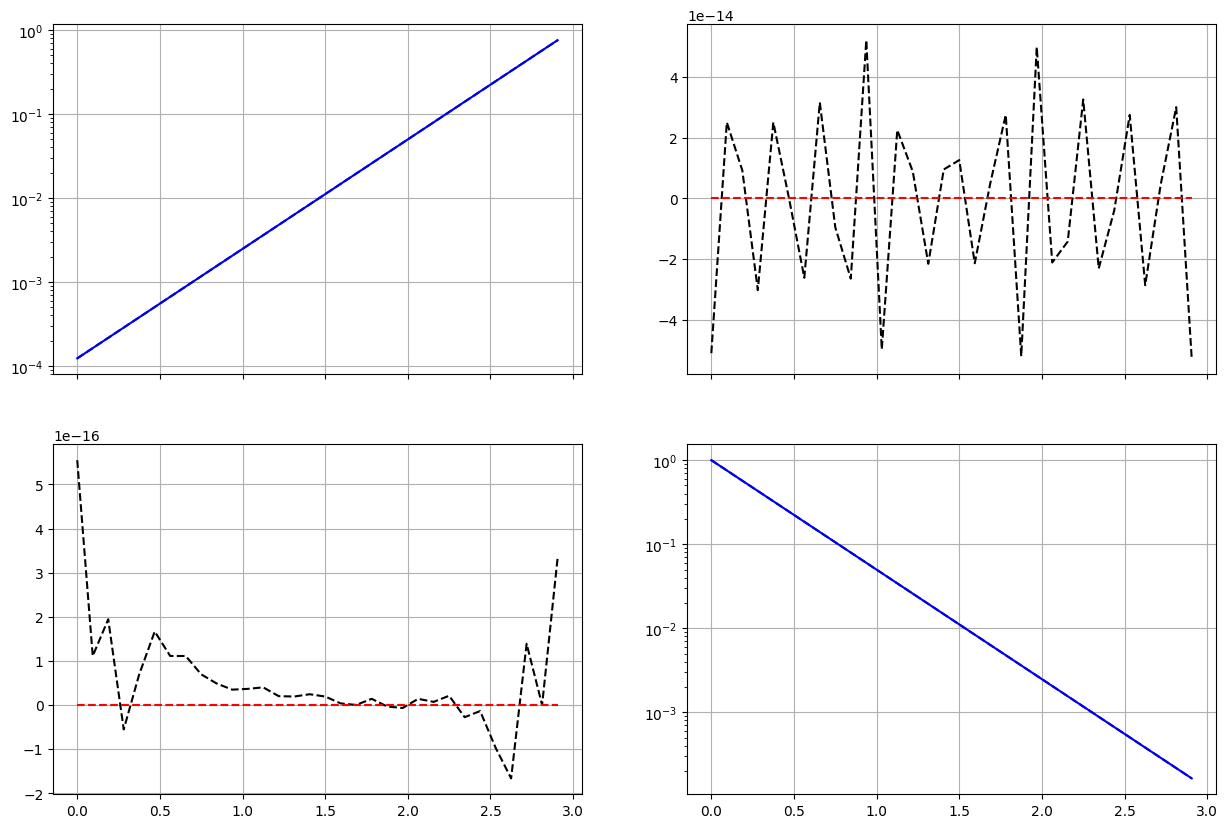

In [26]:
k=0
ee = 3
tau = np.linspace(0,Nt-1,Nt)*delta
node = list(h5.values())[0]
corrNI = node['NonInteracting/correlators/single/particle/k'+str(k)][()]
fig,ax = plt.subplots(2,2,sharex=True,figsize=(15,10))
corrNI = corrNI.reshape(32,2,2)
for sigma1 in [0,1]:
    for sigma2 in [0,1]:
        ax[sigma1,sigma2].plot(tau,corrNI[:,sigma1,sigma2].real,'k--')
        ax[sigma1,sigma2].plot(tau,corrNI[:,sigma1,sigma2].imag,'r--')
        if sigma1==sigma2:
            if sigma1==0:
                cc = np.exp(-(2*sigma1-1)*ee*tau)*f(ee*(2*sigma1-1),beta)
            else:
                cc = np.exp(-(2*sigma1-1)*ee*tau)*f(ee*(2*sigma1-1),beta)
            ax[sigma1,sigma2].plot(tau,cc,'b-')
            ax[sigma1,sigma2].set_yscale('log')
        ax[sigma1,sigma2].grid()

# Interacting correlators

In [27]:
configs = np.linspace(0,49999,50000)
configs = node['markovChain'].keys()
momenta = np.linspace(0,nx*ny-1,nx*ny)
corrI = []
for config in configs:
    kcorr = []
    for k in momenta:
        corr = node[f'markovChain/{int(config)}/correlators/single/particle/k{int(k)}'][()]
        kcorr.append(corr.reshape(Nt,2,2))
    corrI.append(np.array(kcorr))
corrI = np.array(corrI)

In [28]:
_, corrI_re_err = bsCorrelator(corrI[:,:,:,:,:].real,200)
_, corrI_im_err = bsCorrelator(corrI[:,:,:,:,:].imag,200)

In [29]:
corrI_avg=np.mean(corrI,axis=0)

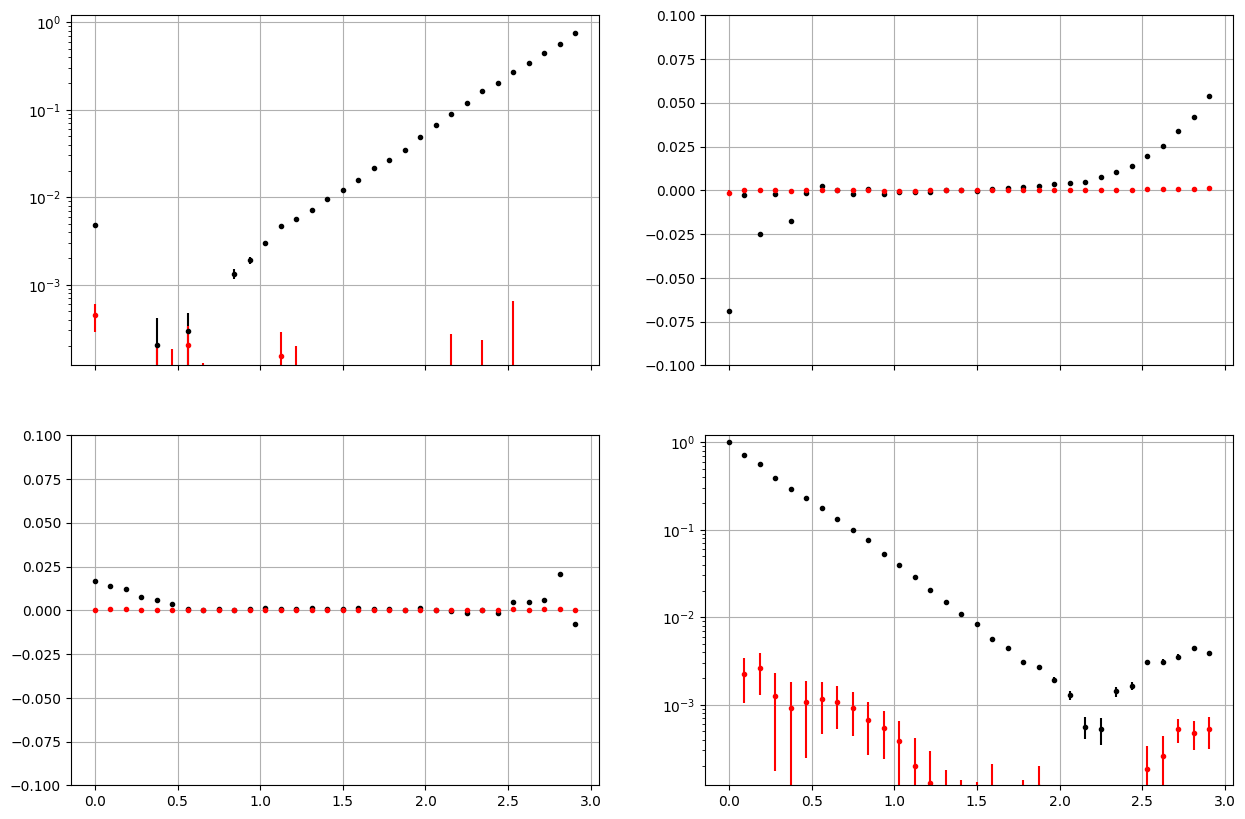

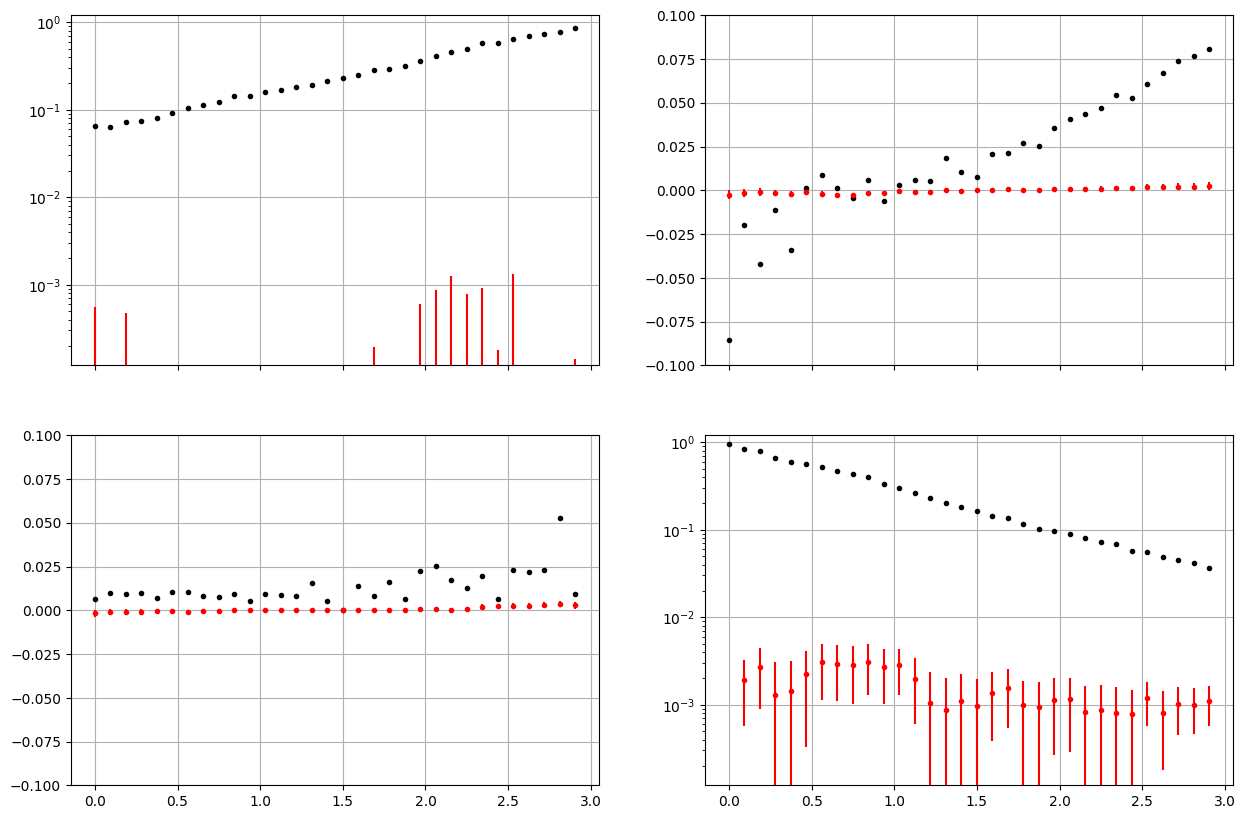

In [31]:
tau = np.linspace(0,Nt-1,Nt)*delta
for k in range(nx*ny):
    fig,ax = plt.subplots(2,2,sharex=True,figsize=(15,10))
    for sigma1 in [0,1]:
        for sigma2 in [0,1]:
            ax[sigma1,sigma2].errorbar(tau,corrI_avg[k,:,sigma1,sigma2].real,yerr=corrI_re_err[k,:,sigma1,sigma2],fmt='.',color='black')
            ax[sigma1,sigma2].errorbar(tau,corrI_avg[k,:,sigma1,sigma2].imag,yerr=corrI_im_err[k,:,sigma1,sigma2],fmt='.',color='red')
            ax[sigma1,sigma2].set_ylim(-1e-1,1e-1)
            if sigma1==sigma2:
                ax[sigma1,sigma2].set_yscale('log')
                ax[sigma1,sigma2].set_ylim(1.2e-4,1.2e0)
            ax[sigma1,sigma2].grid()

# Christoph!!! Ignore everything below this!

In [37]:
exactCorr = open("2siteCorrelators.dat",'r').readlines()
tex = np.array([float(ex.split()[0]) for ex in exactCorr])
expp=np.array([float(ex.split()[1]) for ex in exactCorr])
exmm=np.array([float(ex.split()[2]) for ex in exactCorr])

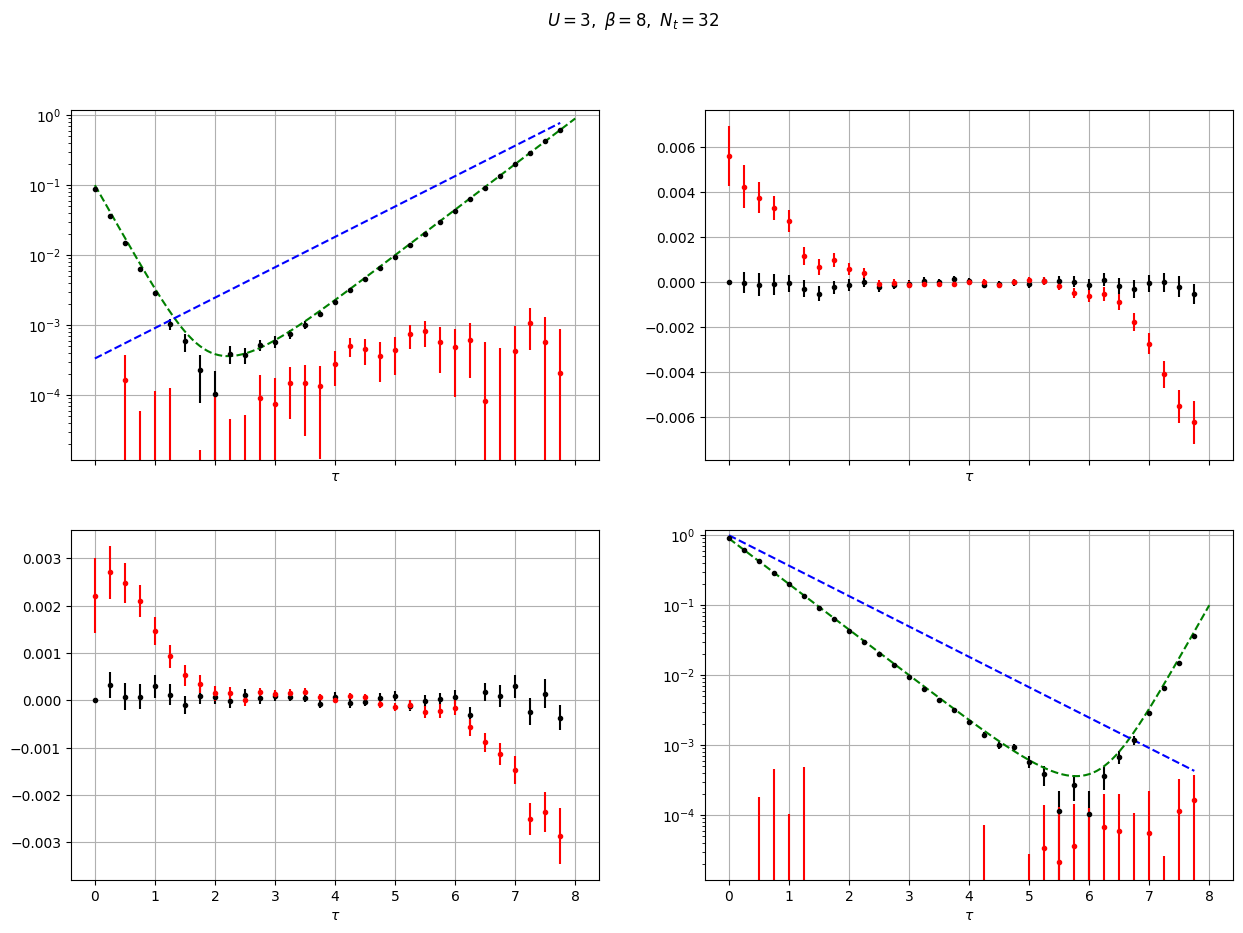

In [38]:
tau = np.linspace(0,Nt-1,Nt)*delta
ee=np.sqrt(1.0)
for k in [0]:
    fig,ax = plt.subplots(2,2,sharex=True,figsize=(15,10))
    for sigma1 in [0,1]:
        for sigma2 in [0,1]:
            ax[sigma1,sigma2].errorbar(tau,corrI_avg[k,:,sigma1,sigma2].real,yerr=corrI_re_err[k,:,sigma1,sigma2],fmt='.',color='black')
            ax[sigma1,sigma2].errorbar(tau,corrI_avg[k,:,sigma1,sigma2].imag,yerr=corrI_im_err[k,:,sigma1,sigma2],fmt='.',color='red')
            #ax[sigma1,sigma2].set_ylim(-1e-2,1e-2)
            if sigma1==sigma2:
                ax[sigma1,sigma2].set_yscale('log')
                ax[sigma1,sigma2].set_ylim(1.2e-5,1.2e0)
                if sigma1==0:
                    cc = np.exp(-(2*sigma1-1)*ee*tau)*f(ee*(2*sigma1-1),beta)
                    ax[sigma1,sigma2].plot(tex,expp,'g--')
                else:
                    cc = np.exp(-(2*sigma1-1)*ee*tau)*f(ee*(2*sigma1-1),beta)
                    ax[sigma1,sigma2].plot(tex,exmm,'g--')
                ax[sigma1,sigma2].plot(tau,cc,'b--')
            ax[sigma1,sigma2].grid()
            ax[sigma1,sigma2].set_xlabel(r'$\tau$')
plt.suptitle(rf'$U={U},\ \beta={beta},\ N_t={Nt}$')
plt.savefig('2site_U3B8Nt32_sp_corr.png')

In [44]:
channels

['cI0S1Iz0Sz1',
 'cI0S1Iz0Szn1',
 'cI1S0Iz1Sz0',
 'cI1S0Izn1Sz0',
 'cI1S1Iz0Sz1',
 'cI1S1Iz0Szn1',
 'cI1S1Iz1Sz0',
 'cI1S1Iz1Sz1',
 'cI1S1Iz1Szn1',
 'cI1S1Izn1Sz0',
 'cI1S1Izn1Sz1',
 'cI1S1Izn1Szn1']

# 2-particle correlators

In [59]:
channels=list(h5[f'NonInteracting/correlators/twobody/'].keys())
momenta=list(h5[f'NonInteracting/correlators/twobody/{channels[0]}'].keys())

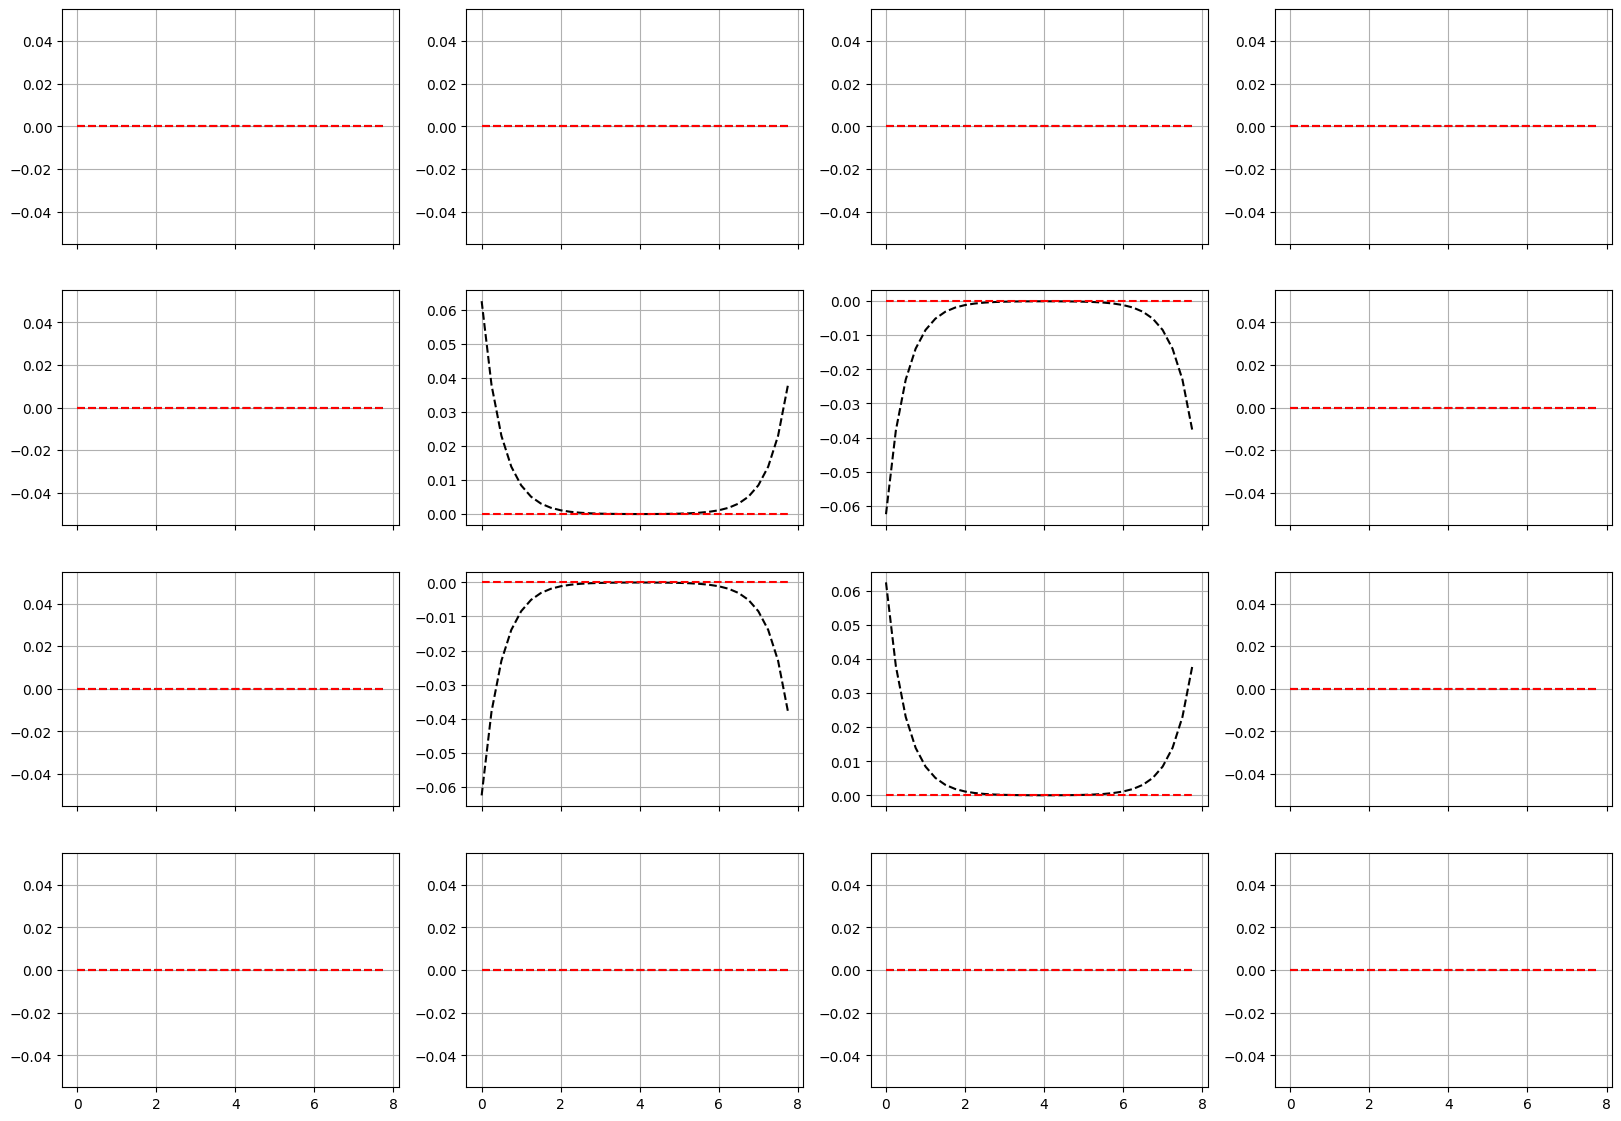

In [60]:
#cc = ['cI0S1Iz0Szn1','cI1S1Iz0Szn1','cI1S1Izn1Szn1']
channel = channels[4]
momentum = momenta[0]

tau = np.linspace(0,Nt-1,Nt)*delta

corrNI = h5[f'NonInteracting/correlators/twobody/{channel}/{momentum}'][()]
fig,ax = plt.subplots(4,4,sharex=True,figsize=(20,14))
corrNI = corrNI.reshape(Nt,2,2,2,2)
for sigma1 in [0,1]:
        for sigma2 in [0,1]:
            for sigma3 in [0,1]:
                for sigma4 in [0,1]:
                    ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tau,corrNI[:,sigma1,sigma2,sigma3,sigma4].real,'k--')
                    ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tau,corrNI[:,sigma1,sigma2,sigma3,sigma4].imag,'r--')
                    #ax[sigma1,sigma2].set_yscale('log')
                    ax[sigma1*2+sigma2,sigma3*2+sigma4].grid()

In [40]:
channels

['cI0S1Iz0Sz1',
 'cI0S1Iz0Szn1',
 'cI1S0Iz1Sz0',
 'cI1S0Izn1Sz0',
 'cI1S1Iz0Sz1',
 'cI1S1Iz0Szn1',
 'cI1S1Iz1Sz0',
 'cI1S1Iz1Sz1',
 'cI1S1Iz1Szn1',
 'cI1S1Izn1Sz0',
 'cI1S1Izn1Sz1',
 'cI1S1Izn1Szn1']

In [61]:
channel = channels[4]
momentum = momenta[0]
configs = np.linspace(0,49999,50000)
momenta = np.linspace(0,nx*ny-1,nx*ny)
corrI = []
for config in configs:
    kcorr = []
    for k in momenta:
        #print(f'markovChain/{int(config)}/correlators/twobody/{channel}/{momentum}')
        corr = h5[f'markovChain/{int(config)}/correlators/twobody/{channel}/{momentum}'][()]
        kcorr.append(corr.reshape(Nt,2,2,2,2))
    corrI.append(np.array(kcorr))
corrI = np.array(corrI)

In [62]:
_, corrI_re_err = bsCorrelator(corrI[:,:,:,:,:].real,200)
_, corrI_im_err = bsCorrelator(corrI[:,:,:,:,:].imag,200)

In [63]:
corrI_avg=np.mean(corrI,axis=0)

In [35]:
corrI_avg.shape

(1, 32, 2, 2, 2, 2)

In [27]:
corr1=open("corr1.dat",'r').readlines()
tt = []
c1e = []
for corr in corr1:
    temp = corr.split()
    tt.append(float(temp[0]))
    c1e.append(float(temp[1]))
tt = np.array(tt)
c1e=np.array(c1e)

In [25]:
corrI_avg.shape

(32, 2, 2, 2, 2)

In [28]:
tau = np.linspace(0,Nt-1,Nt)*delta
configs = np.linspace(0,49999,50000)
for channel in channels:
    corrI = []
    for config in configs:
        kcorr=[]
        for momentum in momenta:
            corr = h5[f'markovChain/{int(config)}/correlators/twobody/{channel}/{momentum}'][()]
            kcorr.append(corr.reshape(Nt,2,2,2,2))
        corrI.append(np.array(kcorr))    
        
    corrI = np.array(corrI)
    _, corrI_re_err = bsCorrelator(corrI[:,:,:,:,:].real,200)
    _, corrI_im_err = bsCorrelator(corrI[:,:,:,:,:].imag,200)   
    corrI_avg=np.mean(corrI,axis=0)
    
    for k in range(len(momenta)):
        corrNI = h5[f'NonInteracting/correlators/twobody/{channel}/{momenta[k]}'][()]
        corrNI = corrNI.reshape(Nt,2,2,2,2)
        fig,ax = plt.subplots(4,4,sharex=True,sharey=False,figsize=(20,14))
        for sigma1 in [0,1]:
            for sigma2 in [0,1]:
                for sigma3 in [0,1]:
                    for sigma4 in [0,1]:
                        ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tau,corrNI[:,sigma1,sigma2,sigma3,sigma4].real,'b--')
                        ax[sigma1*2+sigma2,sigma3*2+sigma4].errorbar(tau,corrI_avg[k,:,sigma1,sigma2,sigma3,sigma4].real,yerr=corrI_re_err[k,:,sigma1,sigma2,sigma3,sigma4],fmt='.',color='black')
                        ax[sigma1*2+sigma2,sigma3*2+sigma4].errorbar(tau,corrI_avg[k,:,sigma1,sigma2,sigma3,sigma4].imag,yerr=corrI_im_err[k,:,sigma1,sigma2,sigma3,sigma4],fmt='.',color='red')
                        ax[sigma1*2+sigma2,sigma3*2+sigma4].grid()
        plt.suptitle(f'{channel}/{momenta[k]}')
        plt.savefig(f'{channel}-{momenta[k]}.png')
        plt.clf()
                    

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

In [39]:
corrI0S1pppp=open("corrI0S1Iz0Sz1pppp.dat",'r').readlines()
corrI0S1pmpm=open("corrI0S1Iz0Sz1pmpm.dat",'r').readlines()
corrI0S1ppmm=open("corrI0S1Iz0Sz1ppmm.dat",'r').readlines()
tt = []
cpppp = []
cpmpm = []
cppmm = []
for corr in corrI0S1pppp:
    temp = corr.split()
    tt.append(float(temp[0]))
    cpppp.append(float(temp[1]))
for corr in corrI0S1pmpm:
    temp = corr.split()
    cpmpm.append(float(temp[1]))
for corr in corrI0S1ppmm:
    temp = corr.split()
    cppmm.append(float(temp[1]))
tt = np.array(tt)
cpppp=np.array(cpppp)
cpmpm=np.array(cpmpm)
cppmm=np.array(cppmm)

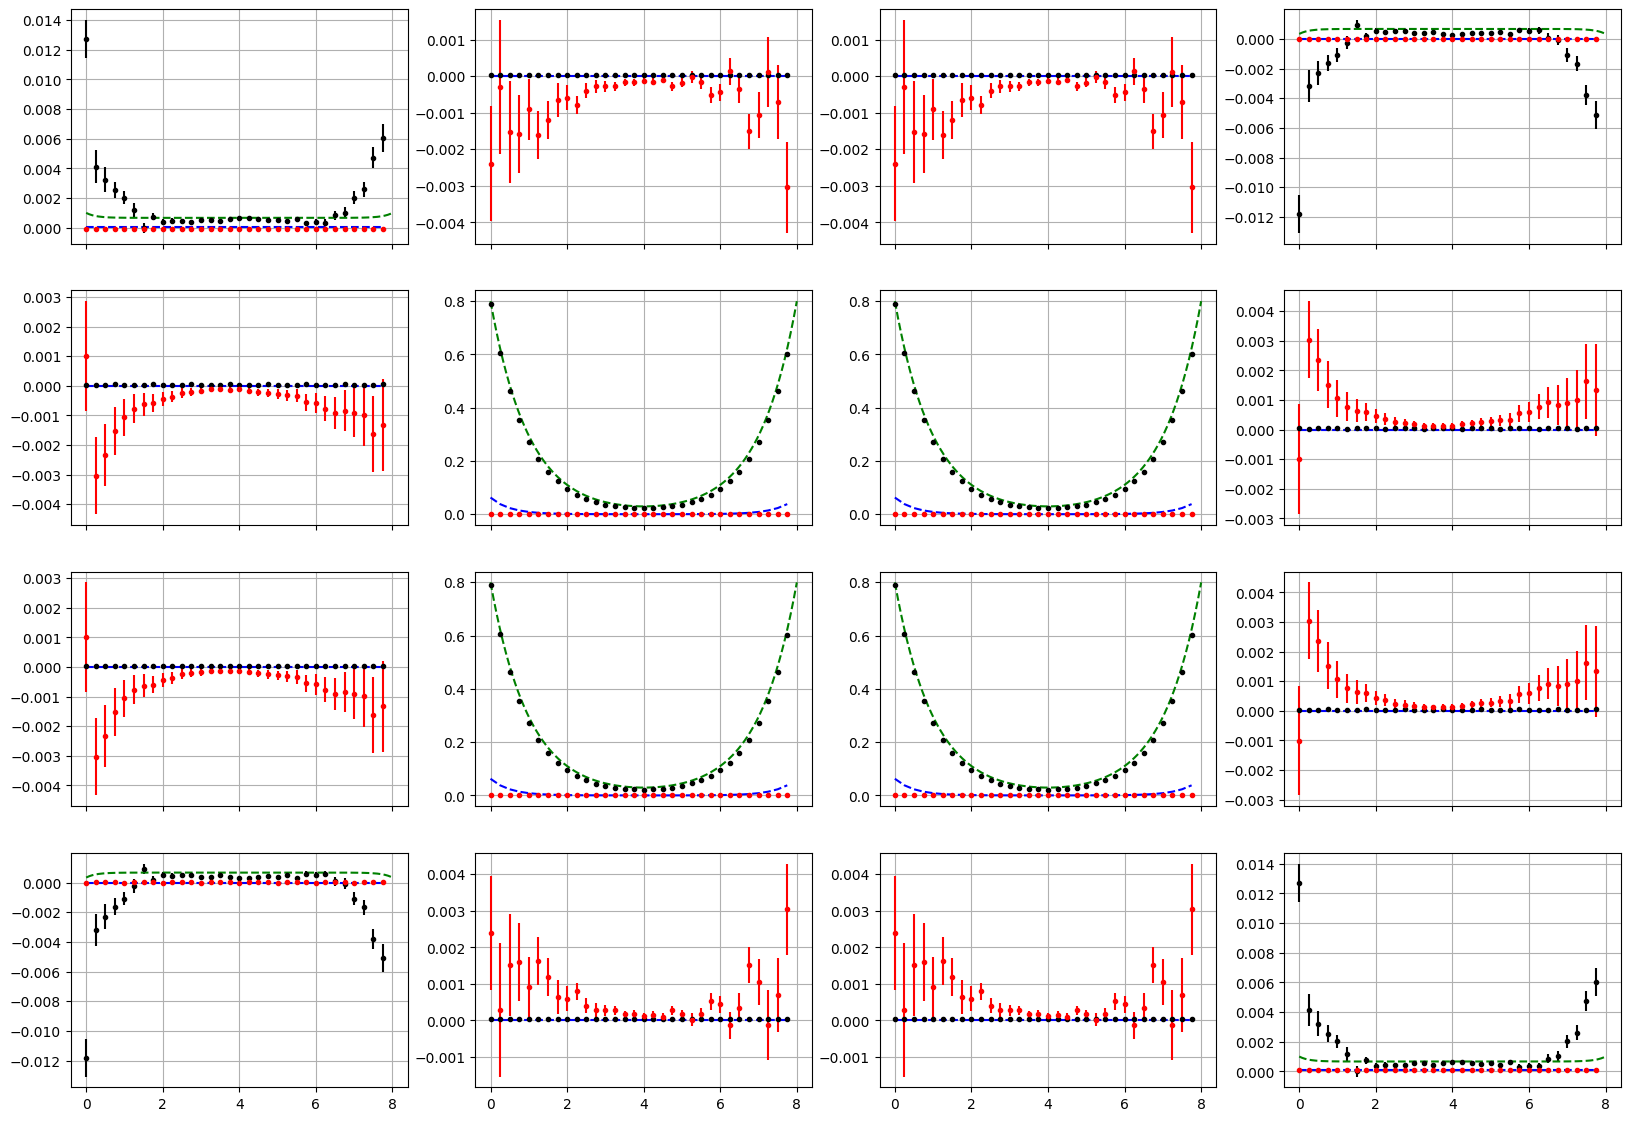

In [58]:
tau = np.linspace(0,Nt-1,Nt)*delta
for k in range(nx*ny):
    fig,ax = plt.subplots(4,4,sharex=True,sharey=False,figsize=(20,14))
    for sigma1 in [0,1]:
        for sigma2 in [0,1]:
            for sigma3 in [0,1]:
                for sigma4 in [0,1]:
                    ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tau,corrNI[:,sigma1,sigma2,sigma3,sigma4].real,'b--')
                    #ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tau,corrNI[:,sigma1,sigma2,sigma3,sigma4].imag,'r--')
                    ax[sigma1*2+sigma2,sigma3*2+sigma4].errorbar(tau,corrI_avg[k,:,sigma1,sigma2,sigma3,sigma4].real,yerr=corrI_re_err[k,:,sigma1,sigma2,sigma3,sigma4],fmt='.',color='black')
                    ax[sigma1*2+sigma2,sigma3*2+sigma4].errorbar(tau,corrI_avg[k,:,sigma1,sigma2,sigma3,sigma4].imag,yerr=corrI_im_err[k,:,sigma1,sigma2,sigma3,sigma4],fmt='.',color='red')
                    ax[sigma1*2+sigma2,sigma3*2+sigma4].grid()
                    if sigma1*2+sigma2==1 and sigma3*2+sigma4==1:
                        ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tt,cpmpm,'g--',label='exact')
                    if sigma1*2+sigma2==2 and sigma3*2+sigma4==2:
                        ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tt,cpmpm,'g--',label='exact')
                    if sigma1*2+sigma2==1 and sigma3*2+sigma4==2:
                        ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tt,cpmpm,'g--',label='exact')
                    if sigma1*2+sigma2==2 and sigma3*2+sigma4==1:
                        ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tt,cpmpm,'g--',label='exact')
                    if sigma1*2+sigma2==0 and sigma3*2+sigma4==0:
                        ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tt,cpppp,'g--',label='exact')
                    if sigma1*2+sigma2==3 and sigma3*2+sigma4==3:
                        ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tt,cpppp,'g--',label='exact')
                    if sigma1*2+sigma2==0 and sigma3*2+sigma4==3:
                        ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tt,cppmm,'g--',label='exact')
                    if sigma1*2+sigma2==3 and sigma3*2+sigma4==0:
                        ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tt,cppmm,'g--',label='exact')

#plt.savefig('I0Iz0S1Sz1.png')


In [64]:
corrI1S1pmpm=open("corrI1S1Iz0Sz1pmpm.dat",'r').readlines()

tt = []
cpmpm = []
for corr in corrI1S1pmpm:
    temp = corr.split()
    tt.append(float(temp[0]))
    cpmpm.append(float(temp[1]))
tt = np.array(tt)
cpmpm=np.array(cpmpm)

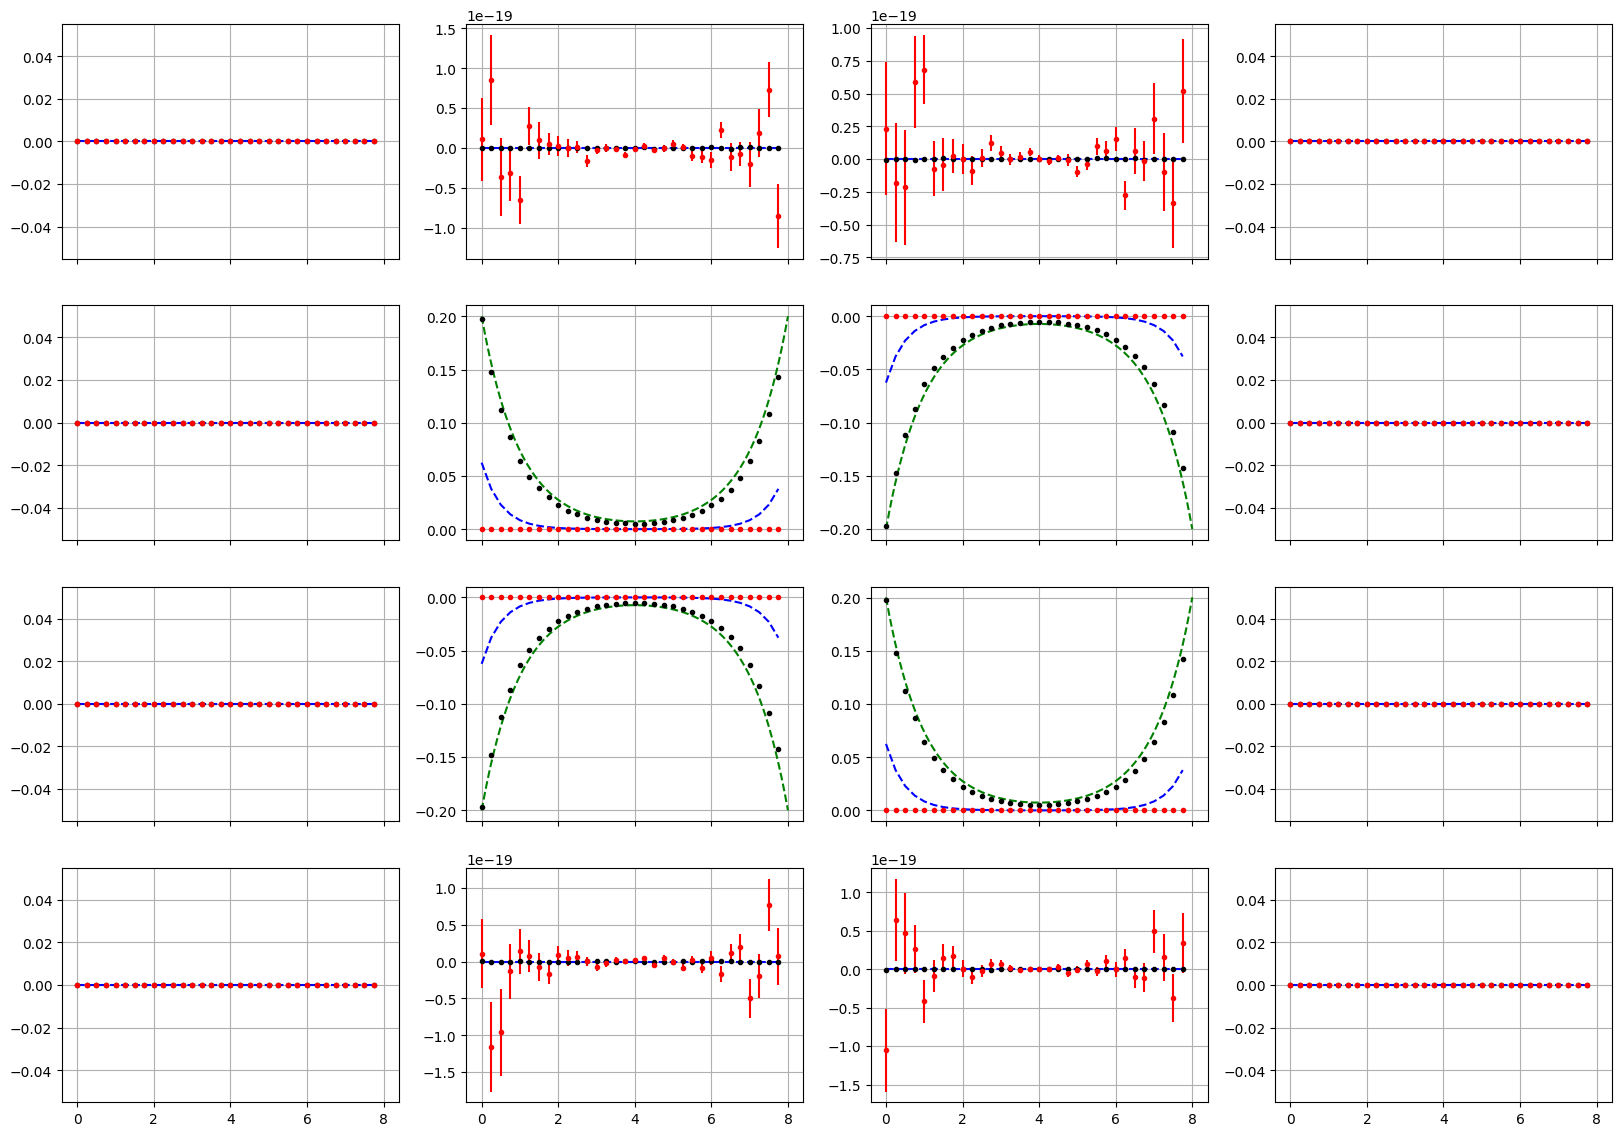

In [66]:
tau = np.linspace(0,Nt-1,Nt)*delta
for k in range(nx*ny):
    fig,ax = plt.subplots(4,4,sharex=True,sharey=False,figsize=(20,14))
    for sigma1 in [0,1]:
        for sigma2 in [0,1]:
            for sigma3 in [0,1]:
                for sigma4 in [0,1]:
                    ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tau,corrNI[:,sigma1,sigma2,sigma3,sigma4].real,'b--')
                    #ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tau,corrNI[:,sigma1,sigma2,sigma3,sigma4].imag,'r--')
                    ax[sigma1*2+sigma2,sigma3*2+sigma4].errorbar(tau,corrI_avg[k,:,sigma1,sigma2,sigma3,sigma4].real,yerr=corrI_re_err[k,:,sigma1,sigma2,sigma3,sigma4],fmt='.',color='black')
                    ax[sigma1*2+sigma2,sigma3*2+sigma4].errorbar(tau,corrI_avg[k,:,sigma1,sigma2,sigma3,sigma4].imag,yerr=corrI_im_err[k,:,sigma1,sigma2,sigma3,sigma4],fmt='.',color='red')
                    ax[sigma1*2+sigma2,sigma3*2+sigma4].grid()
                    if sigma1*2+sigma2==1 and sigma3*2+sigma4==1:
                        ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tt,cpmpm,'g--',label='exact')
                    if sigma1*2+sigma2==2 and sigma3*2+sigma4==2:
                        ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tt,cpmpm,'g--',label='exact')
                    if sigma1*2+sigma2==1 and sigma3*2+sigma4==2:
                        ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tt,-cpmpm,'g--',label='exact')
                    if sigma1*2+sigma2==2 and sigma3*2+sigma4==1:
                        ax[sigma1*2+sigma2,sigma3*2+sigma4].plot(tt,-cpmpm,'g--',label='exact')

#plt.savefig('I1Iz0S1Sz1.png')



In [21]:
h5.close()